In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt
from uncertainties import *

savedir = "E03/"

In [3]:
all_data = loader.load_data( "../CloudVenetoAnalysisHuge/**/" )
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

245

In [4]:
for d in data:
    d['delta'] = stats.compute_in_decades( d['chunks'], lambda d: np.std( d ) ) / d['side'] / d['side'] / ( 1 - d['defects_frac'] )

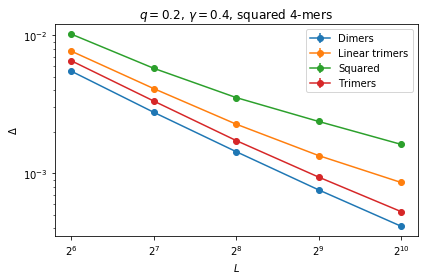

In [13]:
# Dependency by polymer type and side

filtered_data = loader.filter( data, lambda d: d['defects_frac'] == 0.2 and d['gamma'] == 0.4 )

filtered_data = sorted( filtered_data, key = lambda d: d['delta'] )

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['side'],
    lambda d: [
        filtered_data[d]['delta'],
    ],
    lambda it, l: [
        { 'label': fr"{l}", 'ls': '-', 'marker': 'o' }
    ],
    lambda it: (
        plt.title( fr"$q=0.2$, $\gamma=0.4$, squared 4-mers" ),
        plt.xscale( 'log', basex = 2 ),
        plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$L$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$\Delta$" )
    ),
    loc = 'upper right', sort = False
)

plt.tight_layout()
plt.savefig( savedir + "gamma04_q02_squared_wrt_side.pdf" )
plt.savefig( savedir + "gamma04_q02_squared_wrt_side.png" )